Sources:
https://www.kaggle.com/datasets/mirichoi0218/insurance
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

dataset = pd.read_csv('data/insurance.csv')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
dataset.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [5]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='children', ylabel='age'>,
        <AxesSubplot:xlabel='charges', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='children', ylabel='bmi'>,
        <AxesSubplot:xlabel='charges', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='children'>,
        <AxesSubplot:xlabel='bmi', ylabel='children'>,
        <AxesSubplot:xlabel='children', ylabel='children'>,
        <AxesSubplot:xlabel='charges', ylabel='children'>],
       [<AxesSubplot:xlabel='age', ylabel='charges'>,
        <AxesSubplot:xlabel='bmi', ylabel='charges'>,
        <AxesSubplot:xlabel='children', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

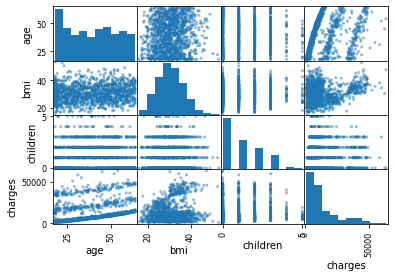

In [6]:
pd.plotting.scatter_matrix(dataset)

<AxesSubplot:>

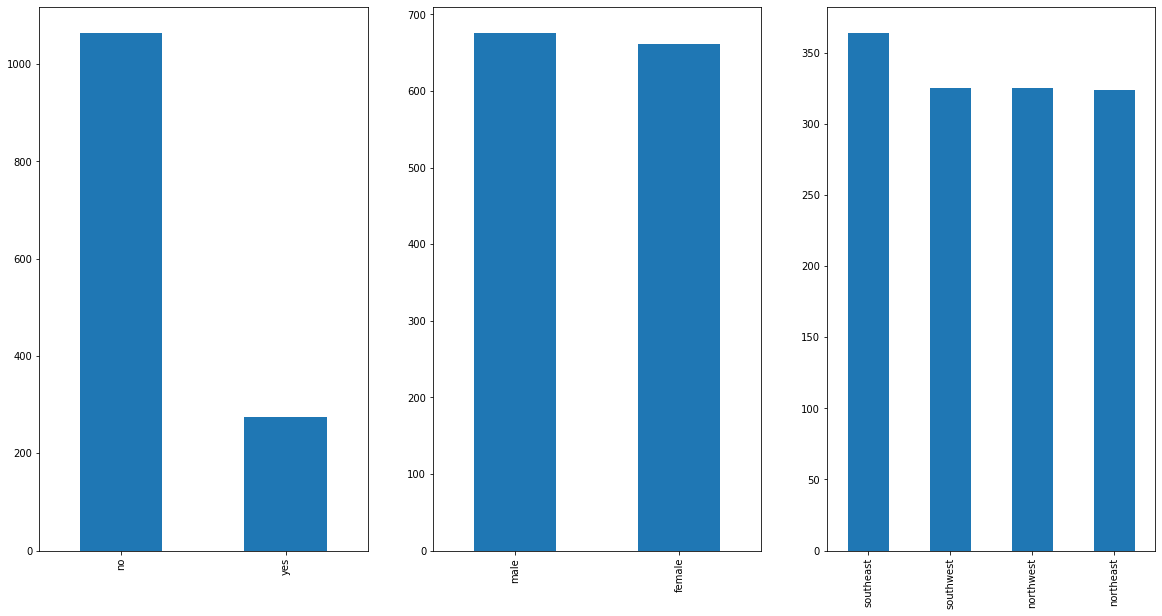

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
dataset['smoker'].value_counts().plot(kind='bar')
plt.subplot(1,3,2)
dataset['sex'].value_counts().plot(kind='bar')
plt.subplot(1,3,3)
dataset['region'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='age', ylabel='charges'>

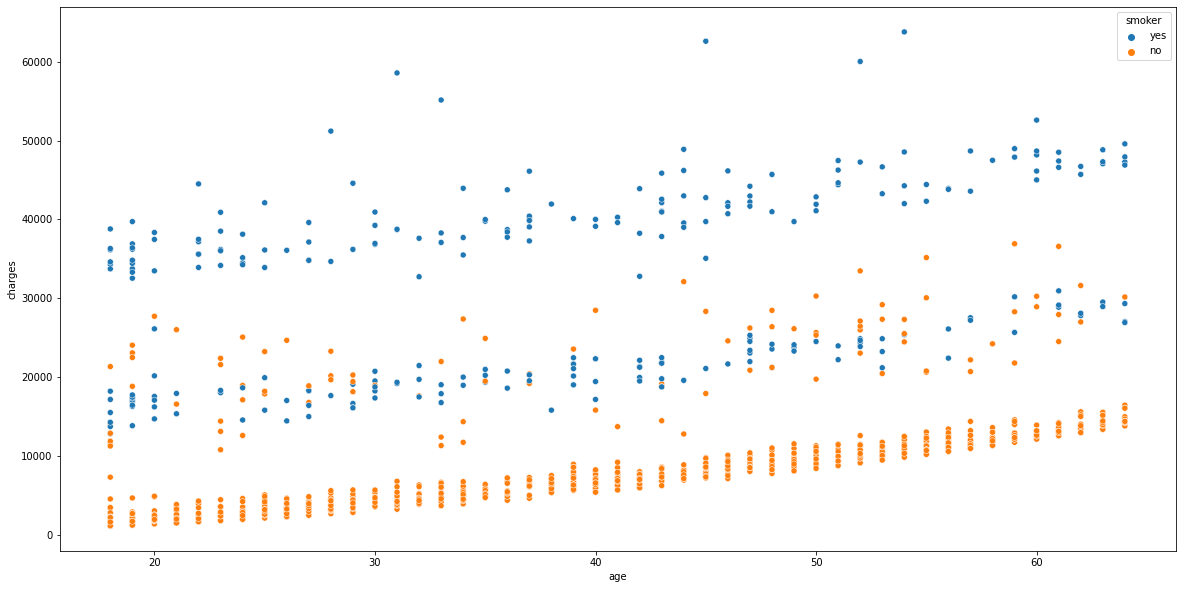

In [8]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=dataset.age, y=dataset.charges, hue=dataset.smoker)

In [9]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return res


In [10]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

df = encode_and_bind(dataset, 'sex')
df = encode_and_bind(df, 'smoker')
df = encode_and_bind(df, 'region')
df.drop(columns=['sex', 'smoker', 'region'], inplace=True)


In [11]:
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [13]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2)

train_x, train_y = train_df.drop(columns=['charges']), train_df.charges
test_x, test_y = test_df.drop(columns=['charges']), test_df.charges

In [14]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=8)

model.fit(train_x, train_y)

predicted_test_y = model.predict(test_x)

In [15]:
results = pd.DataFrame(test_y)
results['predicted'] = predicted_test_y

In [16]:
results

,charges,predicted
1155,7228.21565,7892.022976
55,47496.49445,48812.747775
622,9182.17000,9687.678480
621,40182.24600,38580.914550
354,14133.03775,2097.109143
...,...,...
1330,12629.16560,13075.446085
391,2138.07070,2097.109143
905,4564.19145,7892.022976
222,5253.52400,6002.419939


[Text(0.5, 0, 'actual'), Text(0, 0.5, 'predicted')]

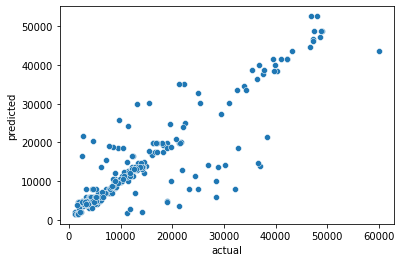

In [17]:
ax = sns.scatterplot(x=test_y, y=predicted_test_y, )
ax.set(xlabel='actual', ylabel='predicted')

In [47]:
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_y, predicted_test_y)
rmse = sqrt(mean_squared_error(test_y, predicted_test_y))

print(f'mae: {mae}, mse: {rmse}')

mae: 3963.7428661731974, mse: 6030.257306032638


In [18]:
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_y, predicted_test_y)
rmse = sqrt(mean_squared_error(test_y, predicted_test_y))

print(f'mae: {mae}, mse: {rmse}')

mae: 2927.719471901554, mse: 5772.644311489986
